### Waves06 versus waves_control02

Gustavo Marques (gmarques@ucar.edu)

In [1]:
from datetime import date
print("Last update:", date.today())

Last update: 2022-01-24


## Brief summary of the experiments 

* gmom.e23.GJRAv3.TL319_t061_zstar_N75.nuopc.waves.006 
* gmom.e23.GJRAv3.TL319_t061_zstar_N75.nuopc.waves_ctrl.002

Both cases run for 20-years. 

In [4]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings, os
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import ztplot, xyplot
warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

In [10]:
path = '/glade/scratch/gmarques/'
exps = ['gmom.e23.GJRAv3.TL319_t061_zstar_N75.nuopc.waves.006', \
        'gmom.e23.GJRAv3.TL319_t061_zstar_N75.nuopc.waves_ctrl.002']
labels = ['Exp6', 'CTRL']

# set this to true to save the plots
saveplot = False
if saveplot:
    os.system('mkdir PNG')

In [6]:
def get_data(full_path, variables):
  def preprocess(ds):
    ''' Return the dataset with variable'''
    return ds[variables]
  ds = xr.open_mfdataset(full_path, data_vars='minimal', \
                         coords='minimal', compat='override', preprocess=preprocess)
  return ds

In [7]:
# load grid and pre-difined masks
grd = MOM6grid(path+exps[0]+'/run/'+exps[0]+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


### 1.1 Globally-averaged ocean properties

/glade/scratch/gmarques/gmom.e23.GJRAv3.TL319_t061_zstar_N75.nuopc.waves.006/run/*mom6.hm_*.nc
/glade/scratch/gmarques/gmom.e23.GJRAv3.TL319_t061_zstar_N75.nuopc.waves_ctrl.002/run/*mom6.hm_*.nc


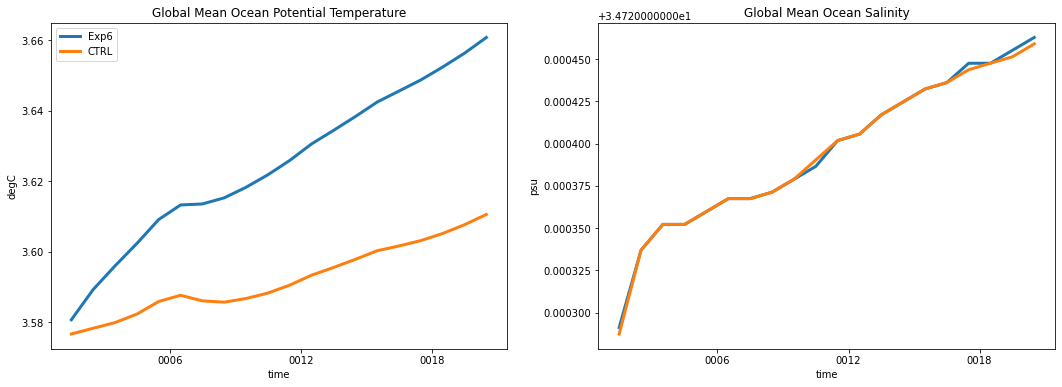

In [11]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
variables = ['thetaoga', 'soga']
for i in range(len(exps)):
  tmp = path+exps[i]+'/run/*mom6.hm_*.nc'
  print(tmp)
  ds = get_data(tmp,variables)
  ds['thetaoga'].plot(ax=ax[0], label=labels[i], lw=3)
  ds['soga'].plot(ax=ax[1], lw=3)

ax[0].set_title(ds.thetaoga.attrs['long_name']); ax[0].set_ylabel(ds.thetaoga.attrs['units'])
ax[1].set_title(ds.soga.attrs['long_name']); ax[1].set_ylabel(ds.soga.attrs['units'])
ax[0].legend()
if saveplot:
    fname = 'PNG/global_means.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

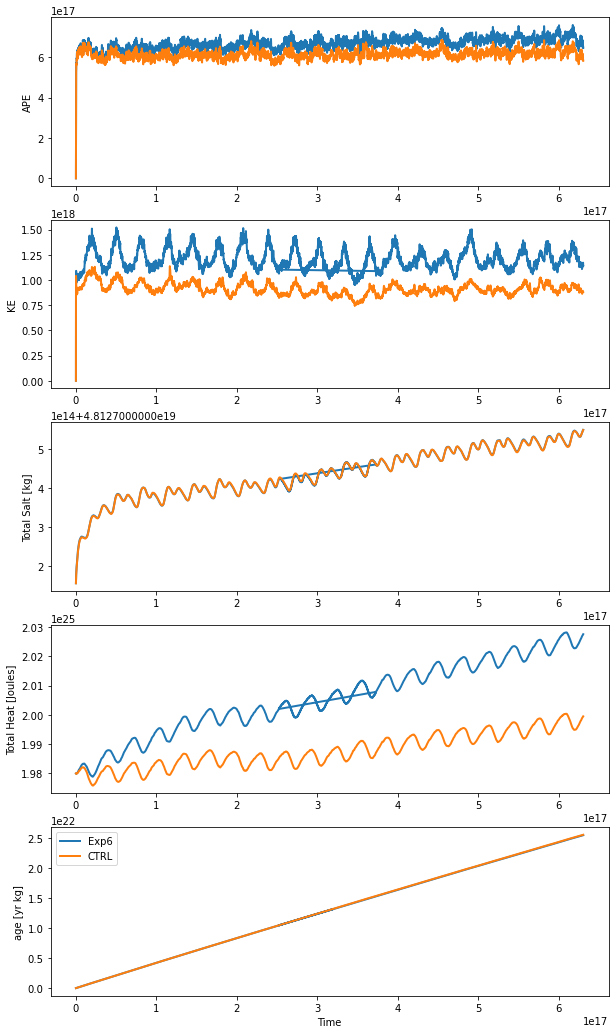

In [12]:
%matplotlib inline
variables = ['APE', 'KE', 'Salt', 'Heat', 'age']
fig, ax = plt.subplots(nrows=len(variables), ncols=1, figsize=(10,18))
for i in range(len(exps)): 
  ds = xr.open_dataset(path+exps[i]+'/run/ocean.stats.nc')
  #ds = ds.isel(Time=range(1000, 21172))
  for var, j in zip(variables, range(len(variables))):
    if len(ds[var].shape) > 1:
        tmp = ds[var].sum(axis=1)
    else:
        tmp = ds[var]
    tmp.plot(ax=ax[j], label=labels[i], lw=2)
    ax[j].set_xlabel('')
    
ax[j].set_xlabel('Time'); ax[j].legend()
if saveplot:
    fname = 'PNG/ocean_stats.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

### Mixed layer depth
#### March

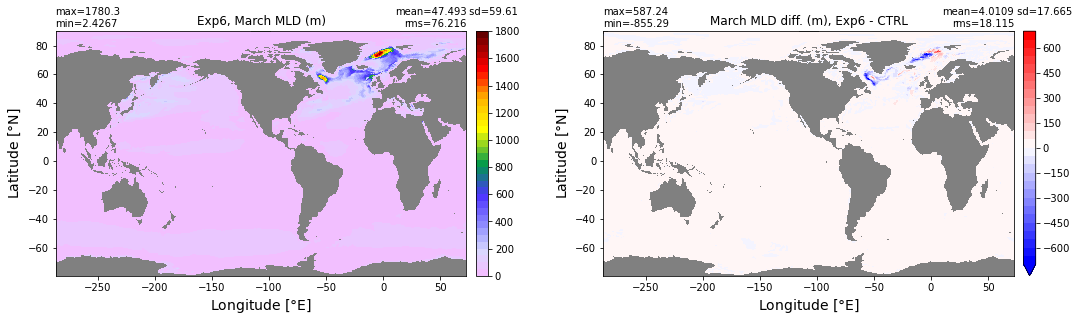

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4.5))
ax1 = ax.flatten()

ds1 = xr.open_dataset('../../'+exps[0]+'/ncfiles/'+exps[0]+'_MLD_March.nc')
ds2 = xr.open_dataset('../../'+exps[1]+'/ncfiles/'+exps[1]+'_MLD_March.nc')

ml1 = np.ma.masked_invalid(ds1.MLD_winter.values)
ml2 = np.ma.masked_invalid(ds2.MLD_winter.values)

xyplot(ml1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[0])+ ', March MLD (m)', axis=ax1[0], 
      clim=(0,1800), nbins=50)

xyplot(ml1-ml2, grd.geolon, grd.geolat, grd.area_t, title='March MLD diff. (m), ' + str(labels[0]+' - '+labels[1]), axis=ax1[1], 
      clim=(-700,700), nbins=50, colormap=plt.cm.bwr, centerlabels=True)


fname = 'PNG/MLD_March_comparison.png'
plt.savefig(fname, bbox_inches='tight',dpi=300)

#### Sep

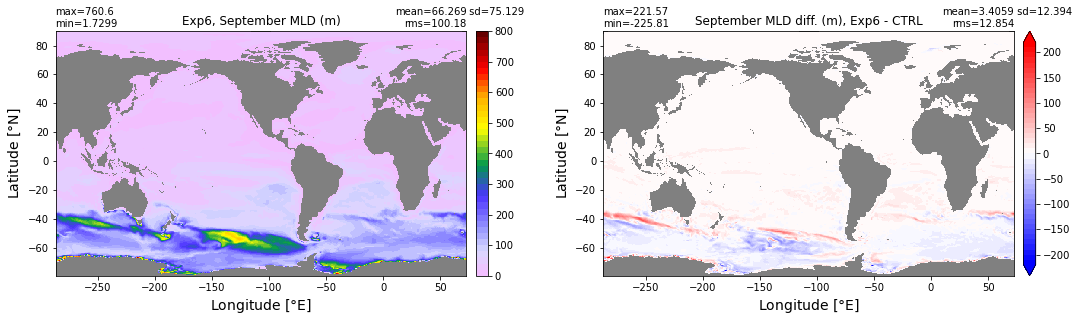

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4.5))
ax1 = ax.flatten()

ds1 = xr.open_dataset('../../'+exps[0]+'/ncfiles/'+exps[0]+'_MLD_September.nc')
ds2 = xr.open_dataset('../../'+exps[1]+'/ncfiles/'+exps[1]+'_MLD_September.nc')

ml1 = np.ma.masked_invalid(ds1.MLD_winter.values)
ml2 = np.ma.masked_invalid(ds2.MLD_winter.values)

xyplot(ml1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[0])+ ', September MLD (m)', axis=ax1[0], 
      clim=(0,800), nbins=50)

xyplot(ml1-ml2, grd.geolon, grd.geolat, grd.area_t, title='September MLD diff. (m), ' + str(labels[0]+' - '+labels[1]), axis=ax1[1], 
      clim=(-220,220), nbins=50, colormap=plt.cm.bwr, centerlabels=True)


fname = 'PNG/MLD_September_comparison.png'
plt.savefig(fname, bbox_inches='tight',dpi=300)

### SSH diference

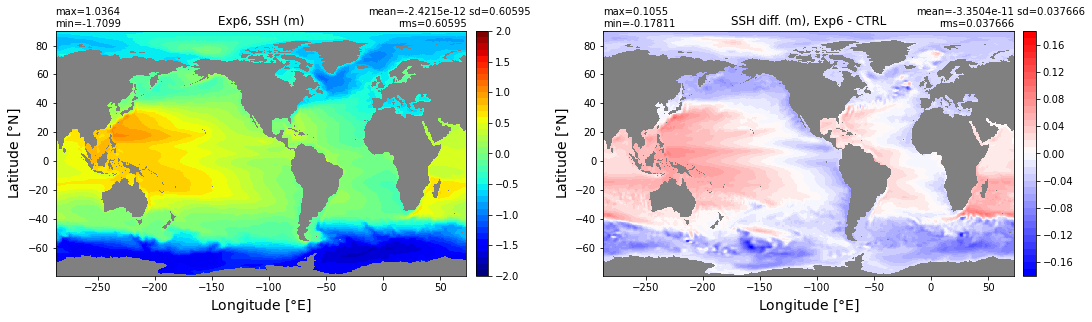

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4.5))
ax1 = ax.flatten()

ds1 = xr.open_dataset('../../'+exps[0]+'/ncfiles/'+exps[0]+'_mean_sea_level.nc')
ds2 = xr.open_dataset('../../'+exps[1]+'/ncfiles/'+exps[1]+'_mean_sea_level.nc')

ssh1 = np.ma.masked_invalid(ds1.mean_sl.values)
ssh2 = np.ma.masked_invalid(ds2.mean_sl.values)

xyplot(ssh1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[0])+ ', SSH (m)', axis=ax1[0], 
      clim=(-2,2), nbins=50, colormap=plt.cm.jet, centerlabels=True)

xyplot(ssh1-ssh2, grd.geolon, grd.geolat, grd.area_t, title='SSH diff. (m), ' + str(labels[0]+' - '+labels[1]), axis=ax1[1], 
      clim=(-0.18,0.18), nbins=50, colormap=plt.cm.bwr, centerlabels=True)


fname = 'PNG/mean_SSH_comparison.png'
plt.savefig(fname, bbox_inches='tight',dpi=300)

### SST diference

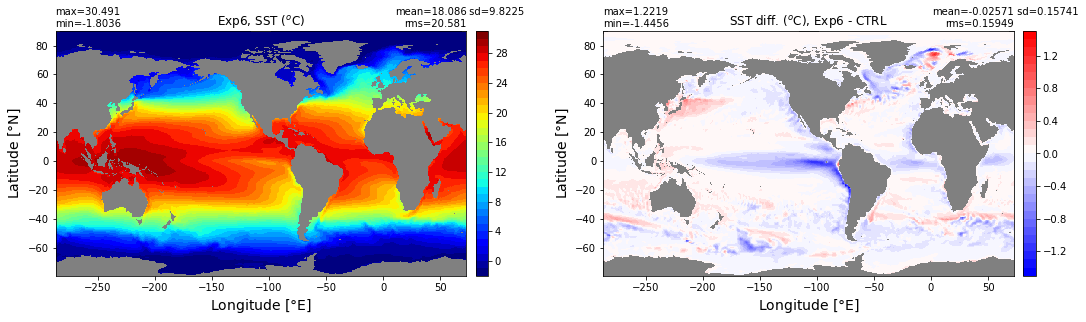

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4.5))
ax1 = ax.flatten()

ds1 = xr.open_dataset('../../'+exps[0]+'/ncfiles/'+exps[0]+'_thetao_time_mean.nc')
ds2 = xr.open_dataset('../../'+exps[1]+'/ncfiles/'+exps[1]+'_thetao_time_mean.nc')

thetao1 = np.ma.masked_invalid(ds1.thetao[0,:].values)
thetao2 = np.ma.masked_invalid(ds2.thetao[0,:].values)

xyplot(thetao1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[0]) + ', SST ($^o$C)', axis=ax1[0], 
      clim=(-1.8,30.5), nbins=50, colormap=plt.cm.jet, centerlabels=True)

xyplot(thetao1-thetao2, grd.geolon, grd.geolat, grd.area_t, title=str('SST diff. ($^o$C), ' + labels[0]+' - '+labels[1]), axis=ax1[1], 
      clim=(-1.5,1.5), nbins=50, colormap=plt.cm.bwr, centerlabels=True)


fname = 'PNG/mean_SST_comparison.png'
plt.savefig(fname, bbox_inches='tight',dpi=300)